In [1]:
import pandas as pd
df= pd.read_csv("wind_power_combined.csv")
df


,date,Air temperature | (°C),Power generated by system | (MW),Pressure | (atm),Wind speed | (m/s)
0,00:00.0,10.926,33.6881,0.979103,9.014
1,00:00.0,9.919,37.2619,0.979566,9.428
2,00:00.0,8.567,30.5029,0.979937,8.700
3,00:00.0,7.877,28.4192,0.980053,8.481
4,00:00.0,7.259,27.3703,0.979867,8.383
...,...,...,...,...,...
43818,31-12-2023 19:00,11.713,30.4221,0.985015,8.703
43819,31-12-2023 20:00,12.115,32.0366,0.985244,8.854
43820,31-12-2023 21:00,11.856,36.3990,0.985639,9.333
43821,31-12-2023 22:00,10.761,37.7404,0.986212,9.457


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Features (X) are 'Air temperature | (°C)', 'Pressure | (atm)', and 'Wind speed | (m/s)'
# Target (y) is 'Power generated by system | (MW)'

# Extracting features (X) and target (y)
X = df[['Air temperature | (°C)', 'Pressure | (atm)', 'Wind speed | (m/s)']]
y = df['Power generated by system | (MW)']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the Random Forest regressor
rf_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluating the model using metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 0.16998322902110674
Mean Squared Error: 0.0882949156972998
R-squared: 0.9997132018531165


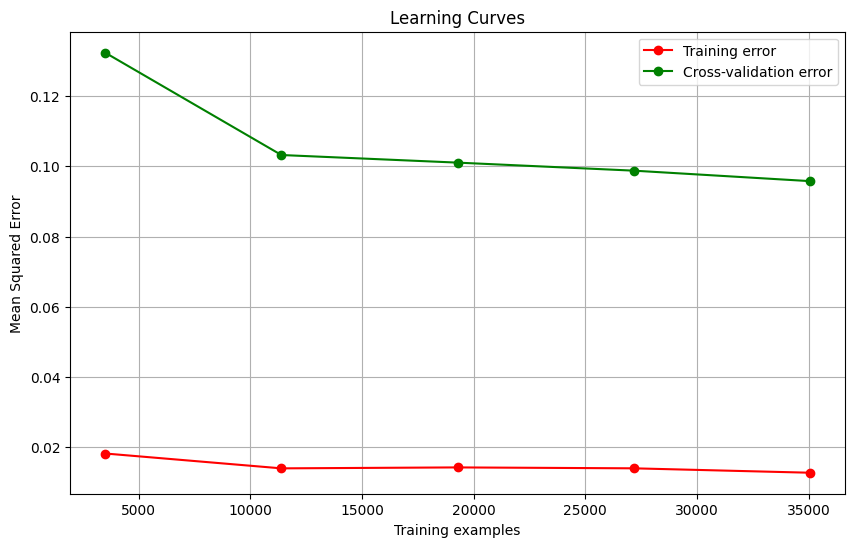

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to plot learning curves
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation error")
    plt.xlabel("Training examples")
    plt.ylabel("Mean Squared Error")
    plt.title("Learning Curves")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot learning curves
plot_learning_curve(rf_regressor, X, y)


In [4]:
# Load the forecasted data for 2024
forecasted_data_2024 = pd.read_excel("wind_test_data.xlsx")

# Extracting features for prediction
X_forecasted = forecasted_data_2024[['Air temperature | (°C)', 'Pressure | (atm)', 'Wind speed | (m/s)']]

# Predict power generation using the trained Random Forest regressor
predictions = rf_regressor.predict(X_forecasted)

# Print or save the predictions
print("Predicted power generation for 2024:")
print(predictions)



Predicted power generation for 2024:
[52.991761 51.386981 56.279179 ... 15.120787 13.668678 12.834086]


In [5]:
predictions.sum()

44904.32866117

In [6]:

# Step 1: Load the data
data = pd.read_csv("final_data.csv")

# Step 2: Calculate the total power generated
total_power_generated = data['p1'].sum() + data['p2'].sum() + data['p3'].sum()

# Step 3: Distribute the power to each node based on the specified percentages
power_node1 = total_power_generated * 0.20  # 20% of total power
power_node2 = total_power_generated * 0.45  # 45% of total power
power_node3 = total_power_generated * 0.35  # 35% of total power

# Step 4: Prepare a DataFrame to store the distributed power for each node
node_data = {
    'Node': ['Node 1', 'Node 2', 'Node 3'],
    'Power Generated (MW)': [power_node1, power_node2, power_node3]
}

# Create a DataFrame
power_distribution_df = pd.DataFrame(node_data)

# Calculate the total power generated including P1, P2, and P3
total_power_generated_all = total_power_generated + data['p1'].sum() + data['p2'].sum() + data['p3'].sum()

# Check if generated and distributed powers are equal
equal_powers = total_power_generated == (power_node1 + power_node2 + power_node3)

# Display the DataFrame
print(power_distribution_df)

# Display the total power generated
print("Total Power Generated (including P1, P2, P3):", total_power_generated_all, "MW")

# Display if generated and distributed powers are equal
print("Generated and Distributed Powers are Equal:", equal_powers)


     Node  Power Generated (MW)
0  Node 1          13798.342869
1  Node 2          31046.271455
2  Node 3          24147.100021
Total Power Generated (including P1, P2, P3): 137983.428690224 MW
Generated and Distributed Powers are Equal: True


In [7]:
total_power_generated_all

137983.428690224

In [8]:
# Step 1: Create new columns for each node
data['Power_Node_1'] = data['Power generated by system | (MW)'] * 0.20  # 20% of total power
data['Power_Node_2'] = data['Power generated by system | (MW)'] * 0.45  # 45% of total power
data['Power_Node_3'] = data['Power generated by system | (MW)'] * 0.35  # 35% of total power

# Step 2: Optionally, drop the original columns
data.drop(columns=['Power generated by system | (MW)'], inplace=True)

# Step 3: Display the updated DataFrame
print(data)


                   date stability        p1        p2        p3        c1  \
0      01-01-2019 01:00  unstable  0.859578  0.887445  0.958034 -0.782604   
1      01-01-2019 02:00    stable  0.862414  0.562139  0.781760 -1.940058   
2      01-01-2019 03:00  unstable  0.766689  0.839444  0.109853 -1.207456   
3      01-01-2019 04:00  unstable  0.976744  0.929381  0.362718 -1.027473   
4      01-01-2019 05:00  unstable  0.455450  0.656947  0.820923 -1.125531   
...                 ...       ...       ...       ...       ...       ...   
43818  31-12-2023 19:00    stable  0.257940  0.895296  0.868929 -1.954289   
43819  31-12-2023 20:00    stable  0.848075  0.909264  0.266201 -1.428185   
43820  31-12-2023 21:00  unstable  0.393902  0.441923  0.697164 -0.701491   
43821  31-12-2023 22:00    stable  0.280877  0.532758  0.368188 -1.076426   
43822  31-12-2023 23:00  unstable  0.237036  0.891977  0.656815 -1.579196   

             c2        c3  Air temperature | (°C)  Pressure | (atm)  \
0   

In [9]:
data.head()

,date,stability,p1,p2,p3,c1,c2,c3,Air temperature | (°C),Pressure | (atm),Wind speed | (m/s),Power_Node_1,Power_Node_2,Power_Node_3
0,01-01-2019 01:00,unstable,0.859578,0.887445,0.958034,-0.782604,-1.257395,-1.723086,10.926,0.979103,9.014,6.73762,15.159645,11.790835
1,01-01-2019 02:00,stable,0.862414,0.562139,0.781760,-1.940058,-1.872742,-1.255012,9.919,0.979566,9.428,7.45238,16.767855,13.041665
2,01-01-2019 03:00,unstable,0.766689,0.839444,0.109853,-1.207456,-1.277210,-0.920492,8.567,0.979937,8.700,6.10058,13.726305,10.676015
3,01-01-2019 04:00,unstable,0.976744,0.929381,0.362718,-1.027473,-1.938944,-0.997374,7.877,0.980053,8.481,5.68384,12.788640,9.946720
4,01-01-2019 05:00,unstable,0.455450,0.656947,0.820923,-1.125531,-1.845975,-0.554305,7.259,0.979867,8.383,5.47406,12.316635,9.579605


In [10]:
data.to_csv("new_datset")

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'data' contains your dataset with features and 'stability' column
# Split the dataset into features and target
X = data.drop(columns=['stability', 'date'])  # Remove 'date' column if not needed
y = data['stability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
logistic_regression_model = LogisticRegression()

# Train the model
logistic_regression_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logistic_regression_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


Test Accuracy: 0.7161437535653166
              precision    recall  f1-score   support

      stable       0.65      0.45      0.53      3133
    unstable       0.74      0.86      0.80      5632

    accuracy                           0.72      8765
   macro avg       0.69      0.66      0.66      8765
weighted avg       0.71      0.72      0.70      8765



In [16]:

def predict_power_generation(input_data, model):
    """
    Predict power generation using the trained Random Forest regressor.
    
    Parameters:
        input_data (DataFrame): DataFrame containing features for prediction.
        model: Trained Random Forest regressor model.
    
    Returns:
        predictions (array): Predicted power generation values.
    """
    # Extracting features for prediction
    X_forecasted = input_data[['Air temperature | (°C)', 'Pressure | (atm)', 'Wind speed | (m/s)']]
    
    # Predict power generation
    predictions = model.predict(X_forecasted)
    
    return predictions

# Load the trained Random Forest regressor model
# Assuming rf_regressor is the trained model

# Load the forecasted data for 2024
forecasted_data_2024 = pd.read_excel("wind_test_data.xlsx")

# Get the predictions
predictions = predict_power_generation(forecasted_data_2024, rf_regressor)

# Print the predictions
print("Predicted power generation for 2024:")
print(predictions)

# Define custom input data
custom_input = {
    'Air temperature | (°C)': [2.6, 6.8, 5.9],
    'Pressure | (atm)': [0.9932, 0.0981, 0.9765],
    'Wind speed | (m/s)': [11.5, 11.02, 10.5]          
}

# Create a DataFrame with custom input data
custom_input_df = pd.DataFrame(custom_input)

# Get the predictions using custom input data
custom_predictions = predict_power_generation(custom_input_df, rf_regressor)

# Print the predictions
print("Predicted power generation for custom inputs:")
print(custom_predictions)


Predicted power generation for 2024:
[52.991761 51.386981 56.279179 ... 15.120787 13.668678 12.834086]
Predicted power generation for custom inputs:
[58.342535 52.684337 48.652076]


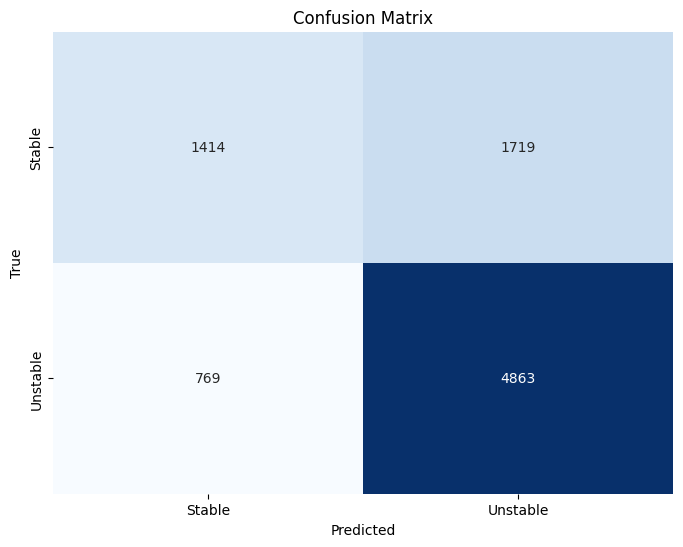

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Stable', 'Unstable'], yticklabels=['Stable', 'Unstable'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [18]:
import pandas as pd

# Assuming you have a DataFrame 'data' with columns 'date' and 'stability'

# Step 1: Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format="%d-%m-%Y %H:%M")

# Step 2: Calculate the percentage of 'Stable' and 'Unstable' grid conditions
stability_percentage = data['stability'].value_counts(normalize=True) * 100
print("Percentage of Stable Grid Conditions:", stability_percentage['stable'], "%")
print("Percentage of Unstable Grid Conditions:", stability_percentage['unstable'], "%")

# Step 3: Identify patterns in the hours when the grid is most prone to instability
# Extract hour from the date column
data['Hour'] = data['date'].dt.hour
unstable_hours = data[data['stability'] == 'unstable']['Hour'].value_counts()
most_unstable_hour = unstable_hours.idxmax()
print("Hour when the grid is most prone to instability:", most_unstable_hour)

# Step 4: Analyze the frequency and duration of 'Unstable' conditions throughout the day
unstable_hours_distribution = data[data['stability'] == 'unstable']['Hour'].value_counts(normalize=True) * 100
print("Distribution of Unstable Conditions throughout the day:")
print(unstable_hours_distribution)


Percentage of Stable Grid Conditions: 36.25265271661 %
Percentage of Unstable Grid Conditions: 63.74734728339 %
Hour when the grid is most prone to instability: 19
Distribution of Unstable Conditions throughout the day:
Hour
19    4.309851
16    4.299112
11    4.295533
3     4.291953
8     4.263316
0     4.256157
13    4.213202
21    4.206042
22    4.188144
15    4.163087
7     4.159507
14    4.155928
20    4.148769
2     4.145189
5     4.138030
4     4.123711
12    4.112973
10    4.112973
18    4.098654
6     4.095074
17    4.066438
1     4.066438
23    4.062858
9     4.027062
Name: proportion, dtype: float64


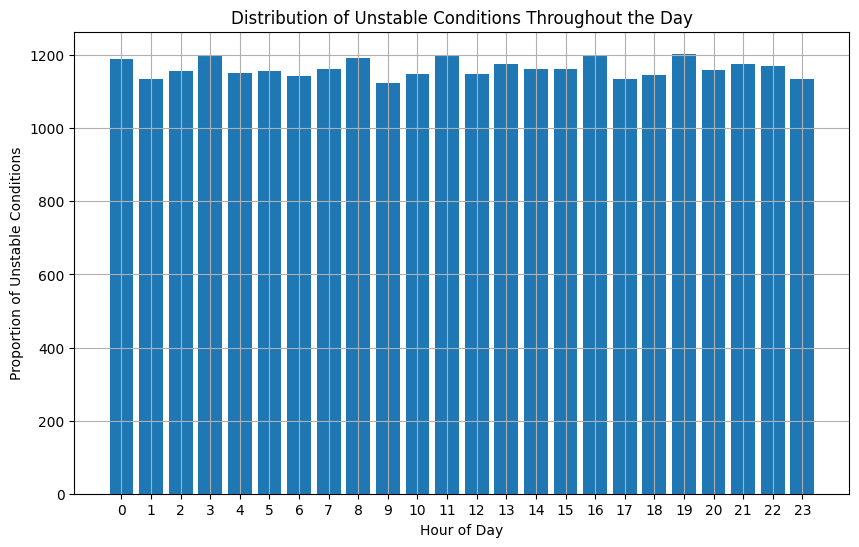

In [19]:
unstable_hour_distribution = unstable_hours.sort_index()
plt.figure(figsize=(10, 6))
plt.bar(unstable_hour_distribution.index, unstable_hour_distribution.values)
plt.xlabel('Hour of Day')
plt.ylabel('Proportion of Unstable Conditions')
plt.title('Distribution of Unstable Conditions Throughout the Day')
plt.xticks(range(24))
plt.grid(True)
plt.show()

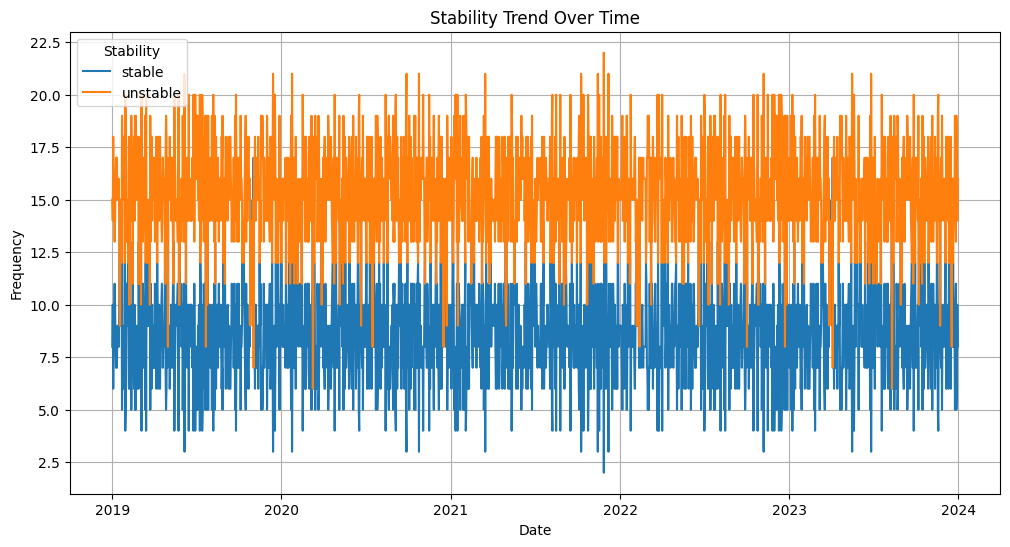

In [20]:
# Step 5: Visualize the trend of stable and unstable conditions over time
data['Date'] = data['date'].dt.date
stability_trend = data.groupby(['Date', 'stability']).size().unstack(fill_value=0)
stability_trend.plot(kind='line', figsize=(12, 6))
plt.title('Stability Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend(title='Stability', loc='upper left')
plt.grid(True)
plt.show()


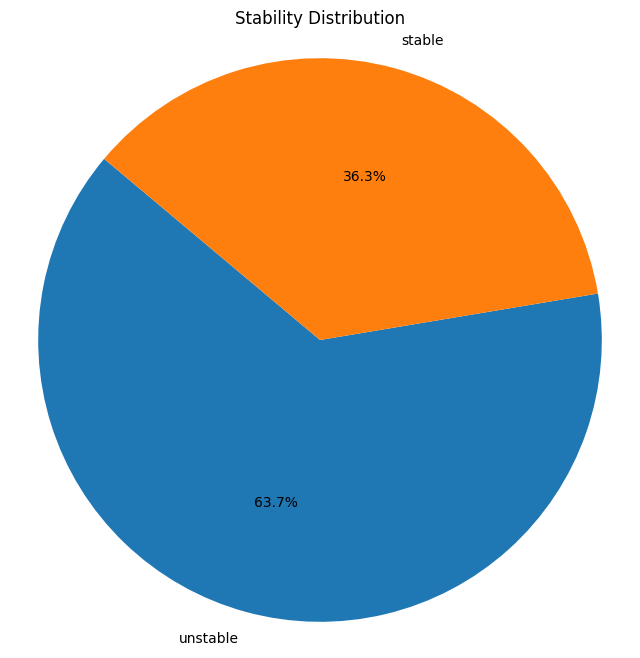

In [21]:
# Calculate stability distribution
stability_counts = data['stability'].value_counts()

# Plot stability pie chart
plt.figure(figsize=(8, 8))
plt.pie(stability_counts, labels=stability_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Stability Distribution')
plt.axis('equal')
plt.show()
